In [ ]:
import warnings
warnings.filterwarnings('ignore')
import cv2
import os
import pathlib
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as img
%matplotlib inline

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving archive.zip to archive.zip


In [ ]:
!unzip archive.zip

Streaming output truncated to the last 5000 lines.
  inflating: digit-images/3/3-268.png  
  inflating: digit-images/3/3-269.png  
  inflating: digit-images/3/3-27.png  
  inflating: digit-images/3/3-270.png  
  inflating: digit-images/3/3-271.png  
  inflating: digit-images/3/3-272.png  
  inflating: digit-images/3/3-273.png  
  inflating: digit-images/3/3-274.png  
  inflating: digit-images/3/3-275.png  
  inflating: digit-images/3/3-276.png  
  inflating: digit-images/3/3-277.png  
  inflating: digit-images/3/3-278.png  
  inflating: digit-images/3/3-279.png  
  inflating: digit-images/3/3-28.png  
  inflating: digit-images/3/3-280.png  
  inflating: digit-images/3/3-281.png  
  inflating: digit-images/3/3-282.png  
  inflating: digit-images/3/3-283.png  
  inflating: digit-images/3/3-284.png  
  inflating: digit-images/3/3-285.png  
  inflating: digit-images/3/3-286.png  
  inflating: digit-images/3/3-287.png  
  inflating: digit-images/3/3-288.png  
  inflating: digit-images/3/3-2

In [ ]:
DIR = os.listdir('digit-images/')

In [ ]:
print(DIR)

['5', '2', '4', '9', '7', '8', '1', '3', '6']


In [ ]:
dirc = 'digit-images/'
data_dir = pathlib.Path(dirc)

In [ ]:
one = list(data_dir.glob('1/*'))

two = list(data_dir.glob('2/*'))

three = list(data_dir.glob('3/*'))

four = list(data_dir.glob('4/*'))

five = list(data_dir.glob('5/*'))

six = list(data_dir.glob('6/*'))

seven = list(data_dir.glob('7/*'))

eight = list(data_dir.glob('8/*'))

nine = list(data_dir.glob('9/*'))

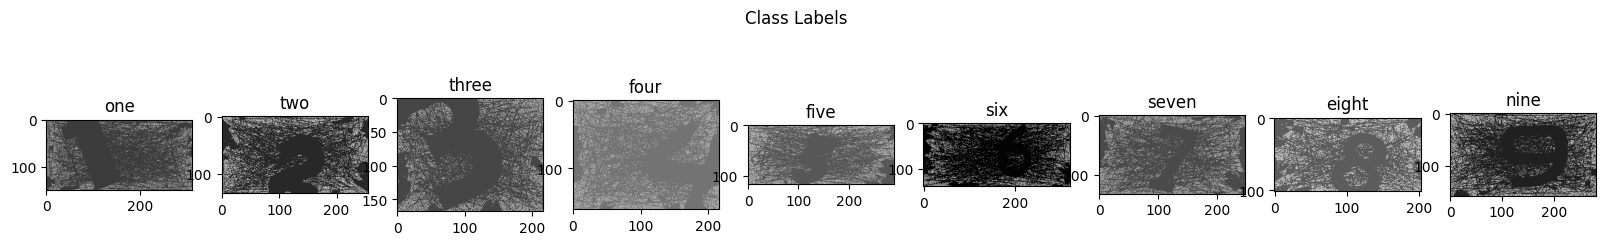

In [ ]:
fig, ax = plt.subplots(ncols=9, figsize=(20,3))
fig.suptitle('Class Labels')

one_image = img.imread(one[1])
ax[0].set_title('one')
ax[0].imshow(one_image)

two_image = img.imread(two[0])
ax[1].set_title('two')
ax[1].imshow(two_image)

three_image = img.imread(three[0])
ax[2].set_title('three')
ax[2].imshow(three_image)

four_image = img.imread(four[0])
ax[3].set_title('four')
ax[3].imshow(four_image)

five_image = img.imread(five[0])
ax[4].set_title('five')
ax[4].imshow(five_image)

six_image = img.imread(six[0])
ax[5].set_title('six')
ax[5].imshow(six_image)

seven_image = img.imread(seven[0])
ax[6].set_title('seven')
ax[6].imshow(seven_image)

eight_image = img.imread(eight[0])
ax[7].set_title('eight')
ax[7].imshow(eight_image)

nine_image = img.imread(nine[0])
ax[8].set_title('nine')
ax[8].imshow(nine_image)

plt.show()

In [ ]:
dirlist=['digit-images/1', 'digit-images/2', 'digit-images/3', 'digit-images/4',
        'digit-images/5', 'digit-images/6', 'digit-images/7', 'digit-images/8',
         'digit-images/9']
classes=['1', '2', '3', '4', '5', '6', '7', '8', '9']
filepaths=[]; labels=[]
for i,j in zip(dirlist, classes):
    filelist=os.listdir(i)
    for f in filelist:
        filepath=os.path.join (i,f)
        filepaths.append(filepath)
        labels.append(j)

In [ ]:
Files = pd.Series(filepaths, name='path'); Label = pd.Series(labels, name='class_label')
df = pd.concat([Files,Label], axis=1)
df.sample(10)

,path,class_label
4216,digit-images/6/6-107.png,6
4970,digit-images/7/7-393.png,7
4304,digit-images/6/6-408.png,6
1883,digit-images/3/3-326.png,3
2474,digit-images/4/4-479.png,4
2853,digit-images/4/4-584.png,4
1039,digit-images/2/2-628.png,2
2683,digit-images/4/4-665.png,4
3269,digit-images/5/5-291.png,5
4841,digit-images/7/7-27.png,7


In [ ]:
print('Total images in the dataset:', len(df))

Total images in the dataset: 6622


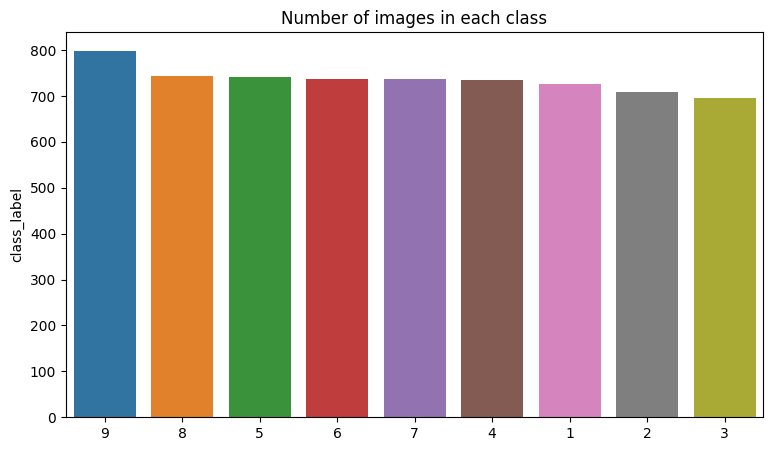

In [ ]:
a = df['class_label'].value_counts()
plt.figure(figsize = (9, 5))
sns.barplot(x = a.index, y = a)
plt.title("Number of images in each class")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_df, test_df = train_test_split(df, test_size = 0.3, random_state = 56)

print('portion of images in train set =', train_df.shape)
print('portion of images in test set =', test_df.shape)
print('-'*50)

train_datagen = ImageDataGenerator(rescale = 1./255)
training_set = train_datagen.flow_from_dataframe(dataframe = train_df, x_col = "path", y_col = "class_label",
                                                 target_size = (100, 100), class_mode = "categorical", batch_size = 32)

test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_dataframe(dataframe = test_df, x_col = "path", y_col = "class_label",
                                            target_size = (100, 100), class_mode = "categorical")

portion of images in train set = (4635, 2)
portion of images in test set = (1987, 2)
--------------------------------------------------
Found 4635 validated image filenames belonging to 9 classes.
Found 1987 validated image filenames belonging to 9 classes.


In [ ]:
import time
import tensorflow
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.layers import Flatten, Dense, BatchNormalization
from tensorflow.keras.layers import GlobalAveragePooling2D, SpatialDropout2D
from tensorflow.keras import layers
from tensorflow.keras.applications import ResNet101V2
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.applications import Xception
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.applications import VGG19
from tensorflow.keras.applications import EfficientNetB7
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
from tensorflow.keras.preprocessing import image

# **DenseNet121 with 16 layers frozen**

In [ ]:
den = DenseNet121(include_top=False, weights='imagenet')
den.trainable = True
for layer in den.layers[:-16]:
  layer.trainable = False
inputs = layers.Input(shape=(100, 100, 3), name="input_layer")
base_layer = den(inputs)
dropout_layer_1 = layers.Dropout(0.5)(base_layer)
flat_layer = layers.Flatten()(dropout_layer_1)
dense_1 = layers.Dense(256, activation="relu")(flat_layer)
dropout_layer_2 = layers.Dropout(0.5)(dense_1)
dense_2 = layers.Dense(128, activation="relu")(dropout_layer_2)
outputs = layers.Dense(9, activation="sigmoid")(dense_2)
model1 = Model(inputs, outputs)
model1.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
model1.summary()

29084464/29084464 [==============================] - 2s 0us/step


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 100, 100, 3)]     0         
                                                                 
 densenet121 (Functional)    (None, None, None, 1024)  7037504   
                                                                 
 dropout (Dropout)           (None, 3, 3, 1024)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 256)               2359552   
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896 

In [ ]:
start_time = time.time()
hist1 = model1.fit(training_set, epochs = 15, validation_data = test_set, shuffle = True)
end_time = time.time()
total_time = end_time - start_time
print("Total time taken for training: {:.2f} seconds".format(total_time))

Epoch 1/15
145/145 [==============================] - 29s 79ms/step - loss: 2.1836 - accuracy: 0.2580 - val_loss: 1.6026 - val_accuracy: 0.4142
Epoch 2/15
145/145 [==============================] - 8s 52ms/step - loss: 1.6576 - accuracy: 0.3843 - val_loss: 1.3652 - val_accuracy: 0.5093
Epoch 3/15
145/145 [==============================] - 6s 44ms/step - loss: 1.4830 - accuracy: 0.4552 - val_loss: 1.2705 - val_accuracy: 0.5662
Epoch 4/15
145/145 [==============================] - 7s 51ms/step - loss: 1.3438 - accuracy: 0.5191 - val_loss: 1.1359 - val_accuracy: 0.5989
Epoch 5/15
145/145 [==============================] - 6s 44ms/step - loss: 1.1832 - accuracy: 0.5840 - val_loss: 1.0514 - val_accuracy: 0.6447
Epoch 6/15
145/145 [==============================] - 7s 50ms/step - loss: 1.0632 - accuracy: 0.6205 - val_loss: 1.0827 - val_accuracy: 0.6387
Epoch 7/15
145/145 [==============================] - 7s 47ms/step - loss: 0.9526 - accuracy: 0.6654 - val_loss: 1.0456 - val_accuracy: 0.649

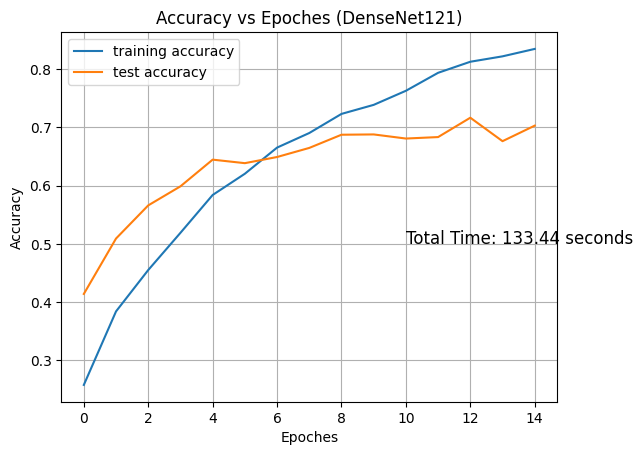

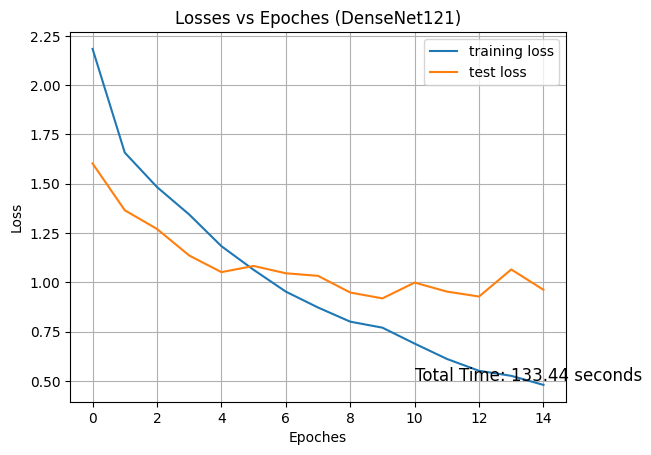

In [ ]:
accuracy1 = hist1.history['accuracy']
val_accuracy1 = hist1.history['val_accuracy']

plt.title("Accuracy vs Epoches (DenseNet121)")
plt.plot(accuracy1, label='training accuracy')
plt.plot(val_accuracy1, label='test accuracy')
plt.xlabel('Epoches')
plt.ylabel('Accuracy')
plt.legend()
plt.text(10, 0.5, f"Total Time: {total_time:.2f} seconds", fontsize=12)
plt.grid()
plt.show()

loss1 = hist1.history['loss']
val_loss1 = hist1.history['val_loss']

plt.title("Losses vs Epoches (DenseNet121)")
plt.plot(loss1, label='training loss')
plt.plot(val_loss1, label='test loss')
plt.xlabel('Epoches')
plt.ylabel('Loss')
plt.legend()
plt.text(10, 0.5, f"Total Time: {total_time:.2f} seconds", fontsize=12)
plt.grid()
plt.show()

# **InceptionV3 with 100 layers frozen**

In [ ]:
inc = InceptionV3(include_top=False, weights='imagenet')
inc.trainable = True
for layer in inc.layers[:-100]:
  layer.trainable = False
inputs = layers.Input(shape=(100, 100, 3), name="input_layer")
base_layer = inc(inputs)
dropout_layer_1 = layers.Dropout(0.5)(base_layer)
flat_layer = layers.Flatten()(dropout_layer_1)
dense_1 = layers.Dense(256, activation="relu")(flat_layer)
dropout_layer_2 = layers.Dropout(0.5)(dense_1)
dense_2 = layers.Dense(128, activation="relu")(dropout_layer_2)
outputs = layers.Dense(9, activation="sigmoid")(dense_2)
model2 = Model(inputs, outputs)
model2.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
model2.summary()

87910968/87910968 [==============================] - 5s 0us/step


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 100, 100, 3)]     0         
                                                                 
 inception_v3 (Functional)   (None, None, None, 2048)  21802784  
                                                                 
 dropout_2 (Dropout)         (None, 1, 1, 2048)        0         
                                                                 
 flatten_1 (Flatten)         (None, 2048)              0         
                                                                 
 dense_3 (Dense)             (None, 256)               524544    
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_4 (Dense)             (None, 128)               3289

In [ ]:
start_time = time.time()
hist2 = model2.fit(training_set, epochs = 15, validation_data = test_set, shuffle = True)
end_time = time.time()
total_time = end_time - start_time
print("Total time taken for training: {:.2f} seconds".format(total_time))

Epoch 1/15
145/145 [==============================] - 27s 73ms/step - loss: 2.1286 - accuracy: 0.2350 - val_loss: 7.2539 - val_accuracy: 0.2622
Epoch 2/15
145/145 [==============================] - 7s 47ms/step - loss: 1.6448 - accuracy: 0.4270 - val_loss: 1.5198 - val_accuracy: 0.4987
Epoch 3/15
145/145 [==============================] - 8s 55ms/step - loss: 1.2693 - accuracy: 0.5627 - val_loss: 1.3021 - val_accuracy: 0.5642
Epoch 4/15
145/145 [==============================] - 8s 54ms/step - loss: 1.0894 - accuracy: 0.6350 - val_loss: 1.6526 - val_accuracy: 0.6024
Epoch 5/15
145/145 [==============================] - 7s 46ms/step - loss: 0.8938 - accuracy: 0.6990 - val_loss: 1.3776 - val_accuracy: 0.5425
Epoch 6/15
145/145 [==============================] - 8s 54ms/step - loss: 0.7833 - accuracy: 0.7461 - val_loss: 1.2015 - val_accuracy: 0.6115
Epoch 7/15
145/145 [==============================] - 8s 53ms/step - loss: 0.6952 - accuracy: 0.7707 - val_loss: 1.1970 - val_accuracy: 0.601

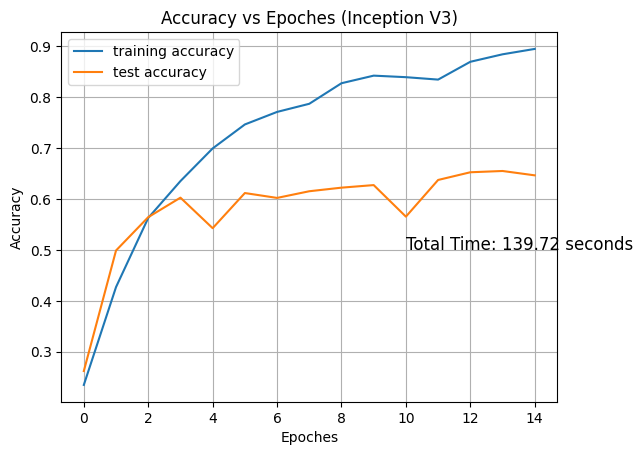

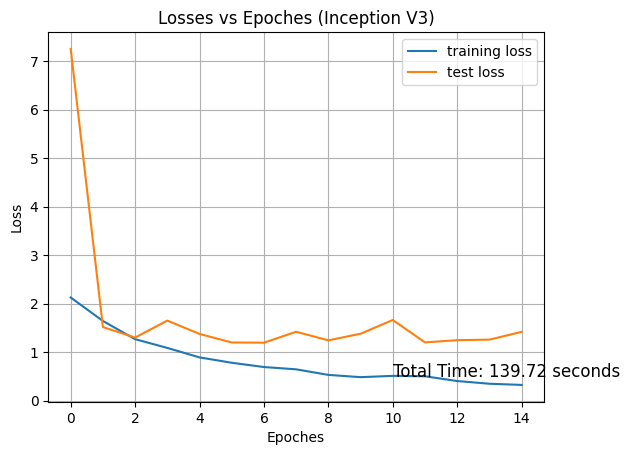

In [ ]:
accuracy2 = hist2.history['accuracy']
val_accuracy2 = hist2.history['val_accuracy']

plt.title("Accuracy vs Epoches (Inception V3)")
plt.plot(accuracy2, label='training accuracy')
plt.plot(val_accuracy2, label='test accuracy')
plt.xlabel('Epoches')
plt.ylabel('Accuracy')
plt.legend()
plt.text(10, 0.5, f"Total Time: {total_time:.2f} seconds", fontsize=12)
plt.grid()
plt.show()

loss2 = hist2.history['loss']
val_loss2 = hist2.history['val_loss']

plt.title("Losses vs Epoches (Inception V3)")
plt.plot(loss2, label='training loss')
plt.plot(val_loss2, label='test loss')
plt.xlabel('Epoches')
plt.ylabel('Loss')
plt.legend()
plt.text(10, 0.5, f"Total Time: {total_time:.2f} seconds", fontsize=12)
plt.grid()
plt.show()

# **Xception with 60 layers frozen**

In [ ]:
xcp = Xception(include_top=False, weights='imagenet')
xcp.trainable = True
for layer in xcp.layers[:-60]:
  layer.trainable = False
inputs = layers.Input(shape=(100, 100, 3), name="input_layer")
base_layer = xcp(inputs)
dropout_layer_1 = layers.Dropout(0.5)(base_layer)
flat_layer = layers.Flatten()(dropout_layer_1)
dense_1 = layers.Dense(256, activation="relu")(flat_layer)
dropout_layer_2 = layers.Dropout(0.5)(dense_1)
dense_2 = layers.Dense(128, activation="relu")(dropout_layer_2)
outputs = layers.Dense(9, activation="sigmoid")(dense_2)
model3 = Model(inputs, outputs)
model3.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
model3.summary()

83683744/83683744 [==============================] - 4s 0us/step


Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 100, 100, 3)]     0         
                                                                 
 xception (Functional)       (None, None, None, 2048)  20861480  
                                                                 
 dropout_4 (Dropout)         (None, 3, 3, 2048)        0         
                                                                 
 flatten_2 (Flatten)         (None, 18432)             0         
                                                                 
 dense_6 (Dense)             (None, 256)               4718848   
                                                                 
 dropout_5 (Dropout)         (None, 256)               0         
                                                                 
 dense_7 (Dense)             (None, 128)               3289

In [ ]:
start_time = time.time()
hist3 = model3.fit(training_set, epochs = 15, validation_data = test_set, shuffle = True)
end_time = time.time()
total_time = end_time - start_time
print("Total time taken for training: {:.2f} seconds".format(total_time))

Epoch 1/15
145/145 [==============================] - 28s 81ms/step - loss: 2.1464 - accuracy: 0.1726 - val_loss: 2.3555 - val_accuracy: 0.1681
Epoch 2/15
145/145 [==============================] - 10s 69ms/step - loss: 1.8590 - accuracy: 0.3243 - val_loss: 3.1447 - val_accuracy: 0.2984
Epoch 3/15
145/145 [==============================] - 10s 67ms/step - loss: 1.5097 - accuracy: 0.4589 - val_loss: 2.0023 - val_accuracy: 0.4524
Epoch 4/15
145/145 [==============================] - 10s 69ms/step - loss: 1.2442 - accuracy: 0.5625 - val_loss: 1.5653 - val_accuracy: 0.5053
Epoch 5/15
145/145 [==============================] - 10s 67ms/step - loss: 1.0275 - accuracy: 0.6520 - val_loss: 1.1873 - val_accuracy: 0.5984
Epoch 6/15
145/145 [==============================] - 10s 68ms/step - loss: 0.8721 - accuracy: 0.7215 - val_loss: 1.5659 - val_accuracy: 0.5632
Epoch 7/15
145/145 [==============================] - 10s 68ms/step - loss: 0.7106 - accuracy: 0.7730 - val_loss: 1.2899 - val_accuracy:

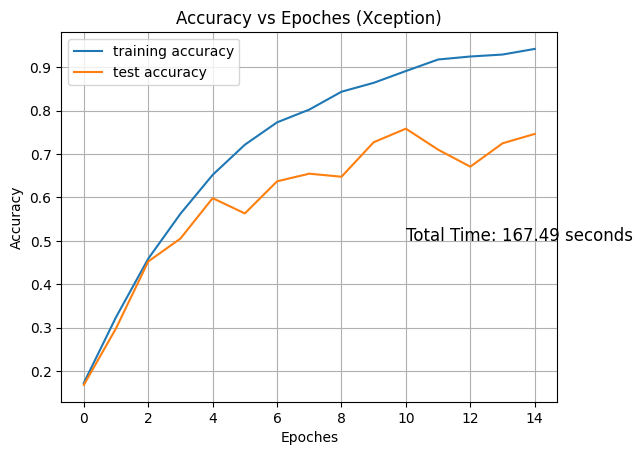

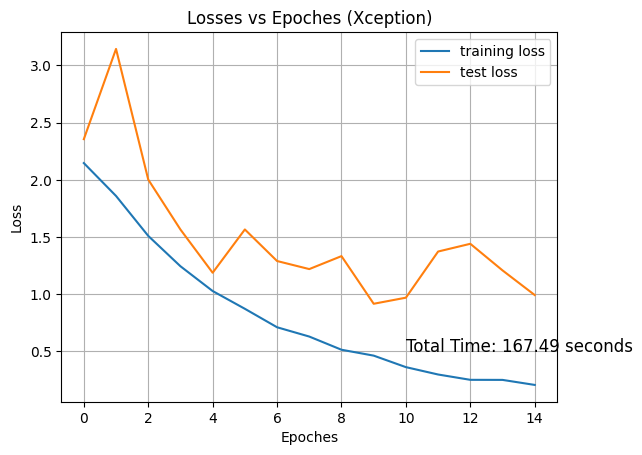

In [ ]:
accuracy3 = hist3.history['accuracy']
val_accuracy3 = hist3.history['val_accuracy']

plt.title("Accuracy vs Epoches (Xception)")
plt.plot(accuracy3, label='training accuracy')
plt.plot(val_accuracy3, label='test accuracy')
plt.xlabel('Epoches')
plt.ylabel('Accuracy')
plt.legend()
plt.text(10, 0.5, f"Total Time: {total_time:.2f} seconds", fontsize=12)
plt.grid()
plt.show()

loss3 = hist3.history['loss']
val_loss3 = hist3.history['val_loss']

plt.title("Losses vs Epoches (Xception)")
plt.plot(loss3, label='training loss')
plt.plot(val_loss3, label='test loss')
plt.xlabel('Epoches')
plt.ylabel('Loss')
plt.legend()
plt.text(10, 0.5, f"Total Time: {total_time:.2f} seconds", fontsize=12)
plt.grid()
plt.show()

# **ResNet101V2 with 60 layers frozen**

In [ ]:
res = ResNet101V2(include_top=False, weights='imagenet')
res.trainable = True
for layer in res.layers[:-60]:
  layer.trainable = False
inputs = layers.Input(shape=(100, 100, 3), name="input_layer")
base_layer = res(inputs)
dropout_layer_1 = layers.Dropout(0.5)(base_layer)
flat_layer = layers.Flatten()(dropout_layer_1)
dense_1 = layers.Dense(256, activation="relu")(flat_layer)
dropout_layer_2 = layers.Dropout(0.5)(dense_1)
dense_2 = layers.Dense(128, activation="relu")(dropout_layer_2)
outputs = layers.Dense(9, activation="sigmoid")(dense_2)
model4 = Model(inputs, outputs)
model4.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
model4.summary()

171317808/171317808 [==============================] - 9s 0us/step


Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 100, 100, 3)]     0         
                                                                 
 resnet101v2 (Functional)    (None, None, None, 2048)  42626560  
                                                                 
 dropout_6 (Dropout)         (None, 4, 4, 2048)        0         
                                                                 
 flatten_3 (Flatten)         (None, 32768)             0         
                                                                 
 dense_9 (Dense)             (None, 256)               8388864   
                                                                 
 dropout_7 (Dropout)         (None, 256)               0         
                                                                 
 dense_10 (Dense)            (None, 128)               3289

In [ ]:
start_time = time.time()
hist4 = model4.fit(training_set, epochs = 15, validation_data = test_set, shuffle = True)
end_time = time.time()
total_time = end_time - start_time
print("Total time taken for training: {:.2f} seconds".format(total_time))

Epoch 1/15
145/145 [==============================] - 33s 118ms/step - loss: 2.1789 - accuracy: 0.2406 - val_loss: 4.2757 - val_accuracy: 0.2360
Epoch 2/15
145/145 [==============================] - 14s 94ms/step - loss: 1.6984 - accuracy: 0.4552 - val_loss: 52.7312 - val_accuracy: 0.2939
Epoch 3/15
145/145 [==============================] - 14s 94ms/step - loss: 1.3075 - accuracy: 0.6037 - val_loss: 28.2470 - val_accuracy: 0.5460
Epoch 4/15
145/145 [==============================] - 14s 94ms/step - loss: 1.0561 - accuracy: 0.6781 - val_loss: 1.6062 - val_accuracy: 0.6467
Epoch 5/15
145/145 [==============================] - 16s 109ms/step - loss: 0.8437 - accuracy: 0.7476 - val_loss: 1.0058 - val_accuracy: 0.7046
Epoch 6/15
145/145 [==============================] - 14s 94ms/step - loss: 0.7858 - accuracy: 0.7730 - val_loss: 1.1089 - val_accuracy: 0.7368
Epoch 7/15
145/145 [==============================] - 14s 96ms/step - loss: 0.7222 - accuracy: 0.7862 - val_loss: 0.9989 - val_accur

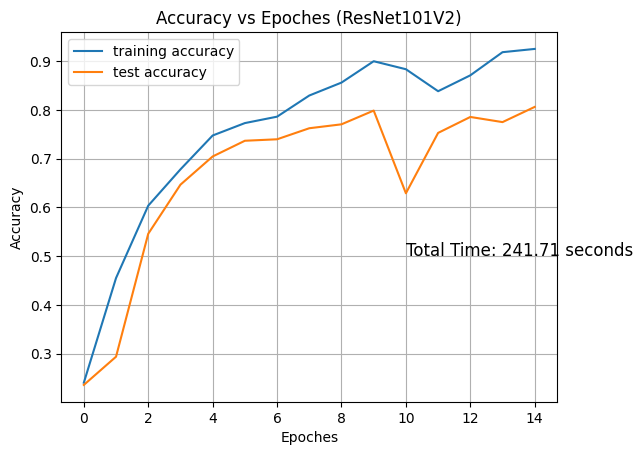

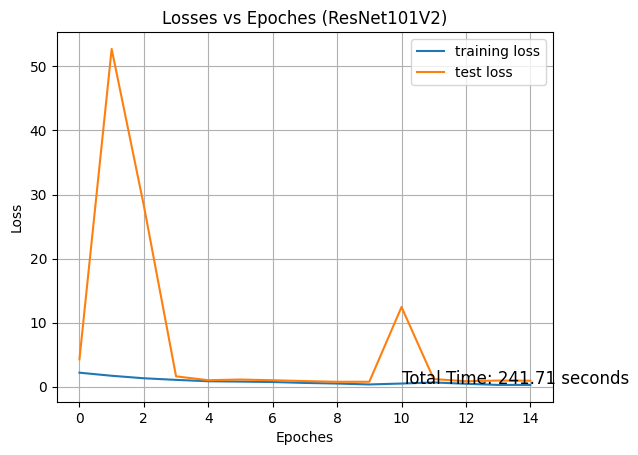

In [ ]:
accuracy4 = hist4.history['accuracy']
val_accuracy4 = hist4.history['val_accuracy']

plt.title("Accuracy vs Epoches (ResNet101V2)")
plt.plot(accuracy4, label='training accuracy')
plt.plot(val_accuracy4, label='test accuracy')
plt.xlabel('Epoches')
plt.ylabel('Accuracy')
plt.legend()
plt.text(10, 0.5, f"Total Time: {total_time:.2f} seconds", fontsize=12)
plt.grid()
plt.show()

loss4 = hist4.history['loss']
val_loss4 = hist4.history['val_loss']

plt.title("Losses vs Epoches (ResNet101V2)")
plt.plot(loss4, label='training loss')
plt.plot(val_loss4, label='test loss')
plt.xlabel('Epoches')
plt.ylabel('Loss')
plt.legend()
plt.text(10, 0.5, f"Total Time: {total_time:.2f} seconds", fontsize=12)
plt.grid()
plt.show()

# **Comparison of all the 4 transfer learning models**

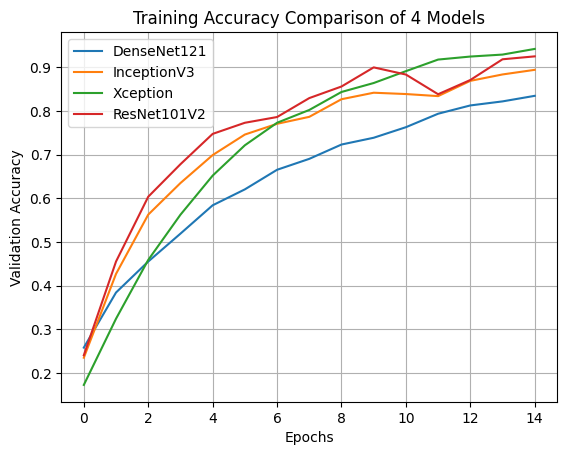

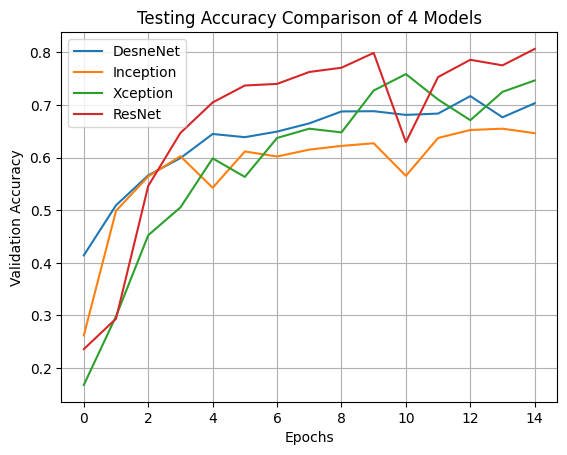

In [ ]:
plt.plot(accuracy1, label='DenseNet121')
plt.plot(accuracy2, label='InceptionV3')
plt.plot(accuracy3, label='Xception')
plt.plot(accuracy4, label='ResNet101V2')


plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.title('Training Accuracy Comparison of 4 Models')
plt.legend()

plt.grid()
plt.show()

plt.plot(val_accuracy1, label='DesneNet')
plt.plot(val_accuracy2, label='Inception')
plt.plot(val_accuracy3, label='Xception')
plt.plot(val_accuracy4, label='ResNet')


plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.title('Testing Accuracy Comparison of 4 Models')
plt.legend()

plt.grid()
plt.show()

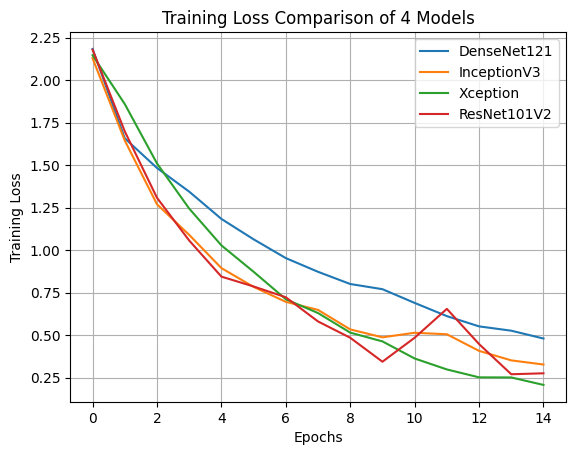

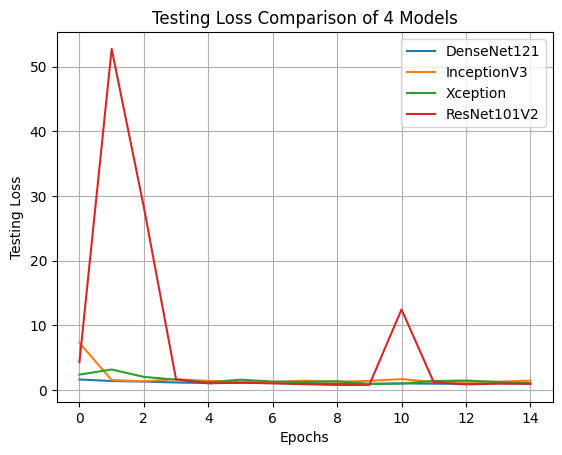

In [ ]:
plt.plot(loss1, label='DenseNet121')
plt.plot(loss2, label='InceptionV3')
plt.plot(loss3, label='Xception')
plt.plot(loss4, label='ResNet101V2')


plt.xlabel('Epochs')
plt.ylabel('Training Loss')
plt.title('Training Loss Comparison of 4 Models')
plt.legend()

plt.grid()
plt.show()

plt.plot(val_loss1, label='DenseNet121')
plt.plot(val_loss2, label='InceptionV3')
plt.plot(val_loss3, label='Xception')
plt.plot(val_loss4, label='ResNet101V2')


plt.xlabel('Epochs')
plt.ylabel('Testing Loss')
plt.title('Testing Loss Comparison of 4 Models')
plt.legend()

plt.grid()
plt.show()